## Import Package

In [1]:
import pandas as pd

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the uploaded CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/flight.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data and data types to understand its structure
data.head(), data.dtypes

(   MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
 0      54993  11/2/2006        12/24/2008   Male         6            .   
 1      28065  2/19/2007          8/3/2007   Male         6          NaN   
 2      55106   2/1/2007         8/30/2007   Male         6            .   
 3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
 4      39546  4/10/2009         4/15/2009   Male         6      guiyang   
 
   WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
 0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
 1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
 2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
 3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
 4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   
 
    LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  

## Data Preprocessing

1. lakukan data preprocessing

In [4]:
# Fix the invalid date by replacing "2014/2/29" with "2014/2/28"
data['LAST_FLIGHT_DATE'] = data['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

# Now convert the corrected date columns to datetime
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'], errors='coerce')
data['FIRST_FLIGHT_DATE'] = pd.to_datetime(data['FIRST_FLIGHT_DATE'], errors='coerce')
data['LAST_FLIGHT_DATE'] = pd.to_datetime(data['LAST_FLIGHT_DATE'], errors='coerce')
data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'], errors='coerce')

# Recheck the dataframe to confirm changes
data[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'LOAD_TIME']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 3   LOAD_TIME          62988 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.9 MB


In [5]:
# Fill missing values
# For categorical data, fill missing values with the mode (most frequent value)
data['GENDER'].fillna(data['GENDER'].mode()[0], inplace=True)
data['WORK_CITY'].fillna(data['WORK_CITY'].mode()[0], inplace=True)
data['WORK_PROVINCE'].fillna(data['WORK_PROVINCE'].mode()[0], inplace=True)
data['WORK_COUNTRY'].fillna(data['WORK_COUNTRY'].mode()[0], inplace=True)

# For numerical data, fill missing values with the median
data['AGE'].fillna(data['AGE'].median(), inplace=True)
data['SUM_YR_1'].fillna(data['SUM_YR_1'].median(), inplace=True)
data['SUM_YR_2'].fillna(data['SUM_YR_2'].median(), inplace=True)

# Recheck the dataframe information to confirm all missing values are handled
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62988 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          62988 non-null  object        
 6   WORK_PROVINCE      62988 non-null  object        
 7   WORK_COUNTRY       62988 non-null  object        
 8   AGE                62988 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62988 non-null  float64       
 13  SUM_YR_2           62988 non-null  float64       
 14  SEG_KM

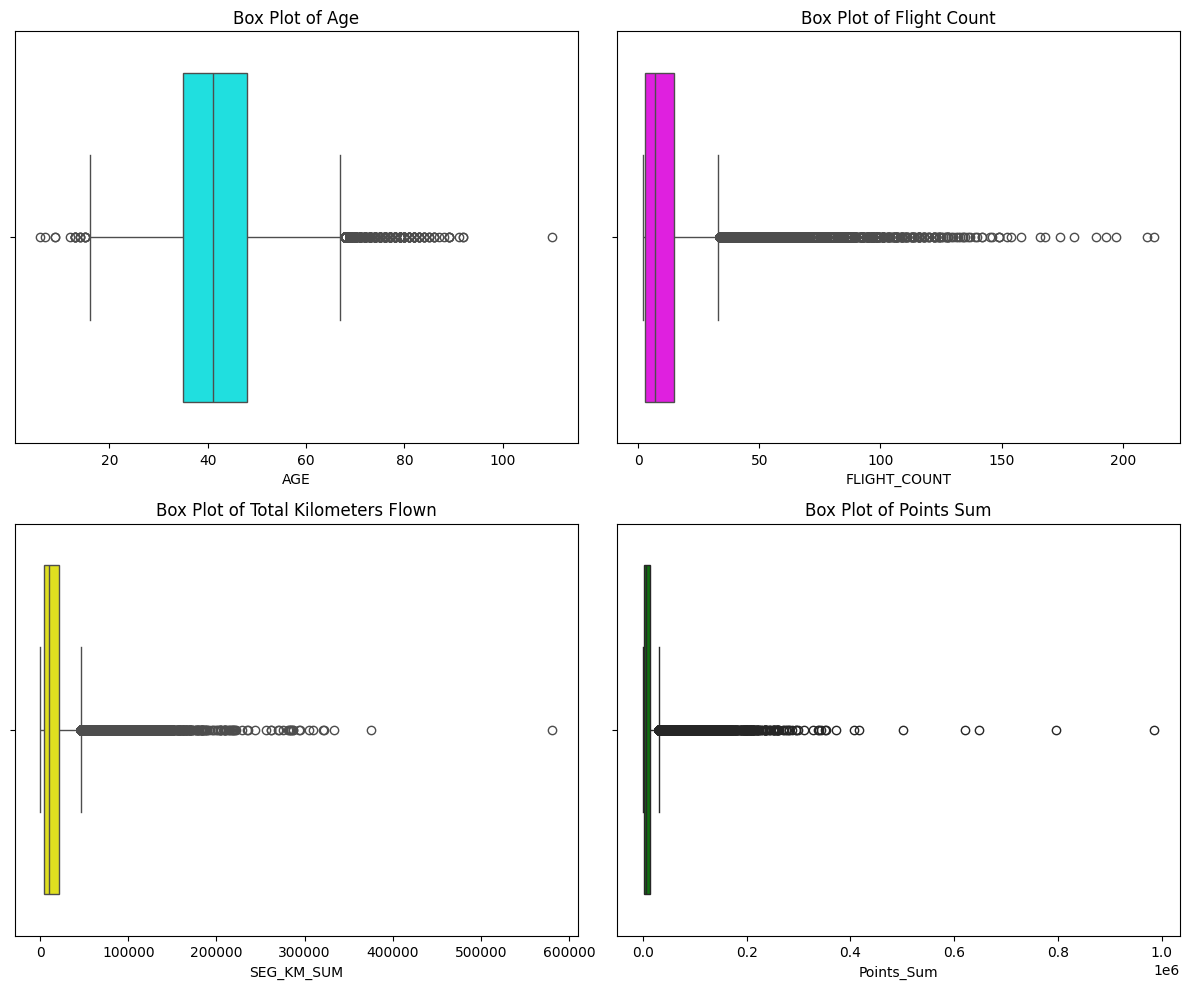

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure for plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for AGE
sns.boxplot(x=data['AGE'], ax=axes[0, 0], color='cyan')
axes[0, 0].set_title('Box Plot of Age')

# Boxplot for FLIGHT_COUNT
sns.boxplot(x=data['FLIGHT_COUNT'], ax=axes[0, 1], color='magenta')
axes[0, 1].set_title('Box Plot of Flight Count')

# Boxplot for SEG_KM_SUM
sns.boxplot(x=data['SEG_KM_SUM'], ax=axes[1, 0], color='yellow')
axes[1, 0].set_title('Box Plot of Total Kilometers Flown')

# Boxplot for Points_Sum
sns.boxplot(x=data['Points_Sum'], ax=axes[1, 1], color='green')
axes[1, 1].set_title('Box Plot of Points Sum')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for the specified columns
columns_to_clean = ['AGE', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'Points_Sum']
for column in columns_to_clean:
    data = remove_outliers(data, column)

# Check the shape of the dataframe after outlier removal
data.shape

(52259, 23)

In [9]:
# Calculate descriptive statistics for numerical columns
descriptive_stats = data.describe()
descriptive_stats

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,52259.000000,52259,52259,52259.000000,52259.000000,52259,52259.000000,52259.000000,52259.000000,52259.000000,52259.000000,51938,52259.000000,52259.000000,52259.000000,52259.000000,52259.000000,52259.000000,52259.000000
mean,31560.588894,2010-05-10 04:46:57.505118720,2010-11-15 19:43:44.275244544,4.028053,41.675960,2014-03-31 00:00:00,7.652711,6075.036109,3195.196622,3160.391550,10551.721790,2013-09-14 07:12:00.998113280,198.471919,75.286312,174.828757,0.117300,0.706147,6600.640196,1.755372
min,1.000000,2004-11-01 00:00:00,2004-11-03 00:00:00,4.000000,16.000000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15816.500000,2008-07-10 00:00:00,2009-05-29 12:00:00,4.000000,35.000000,2014-03-31 00:00:00,3.000000,2177.000000,756.000000,568.000000,4161.000000,2013-05-26 00:00:00,43.000000,29.535897,83.000000,0.000000,0.598288,2399.000000,0.000000
50%,31620.000000,2010-12-19 00:00:00,2011-07-17 00:00:00,4.000000,41.000000,2014-03-31 00:00:00,6.000000,4480.000000,2250.000000,2124.000000,8014.000000,2013-11-17 00:00:00,135.000000,51.800000,155.000000,0.000000,0.700925,4966.000000,0.000000
75%,47345.000000,2012-04-29 00:00:00,2012-08-31 00:00:00,4.000000,48.000000,2014-03-31 00:00:00,11.000000,8758.000000,4592.000000,4629.500000,14977.500000,2014-02-17 00:00:00,309.000000,91.250000,243.000000,0.000000,0.800000,9576.000000,0.000000
max,62988.000000,2013-03-31 00:00:00,2015-05-30 00:00:00,6.000000,67.000000,2014-03-31 00:00:00,33.000000,22745.000000,59310.000000,46820.000000,38284.000000,2014-03-31 00:00:00,731.000000,728.000000,728.000000,20.000000,1.500000,22747.000000,66.000000
std,18184.801301,NaN,NaN,0.203441,9.194671,NaN,6.099586,4993.406337,3351.527456,3449.867164,8100.348687,NaN,187.896613,81.473599,128.960588,0.492683,0.177382,5300.937243,5.330227


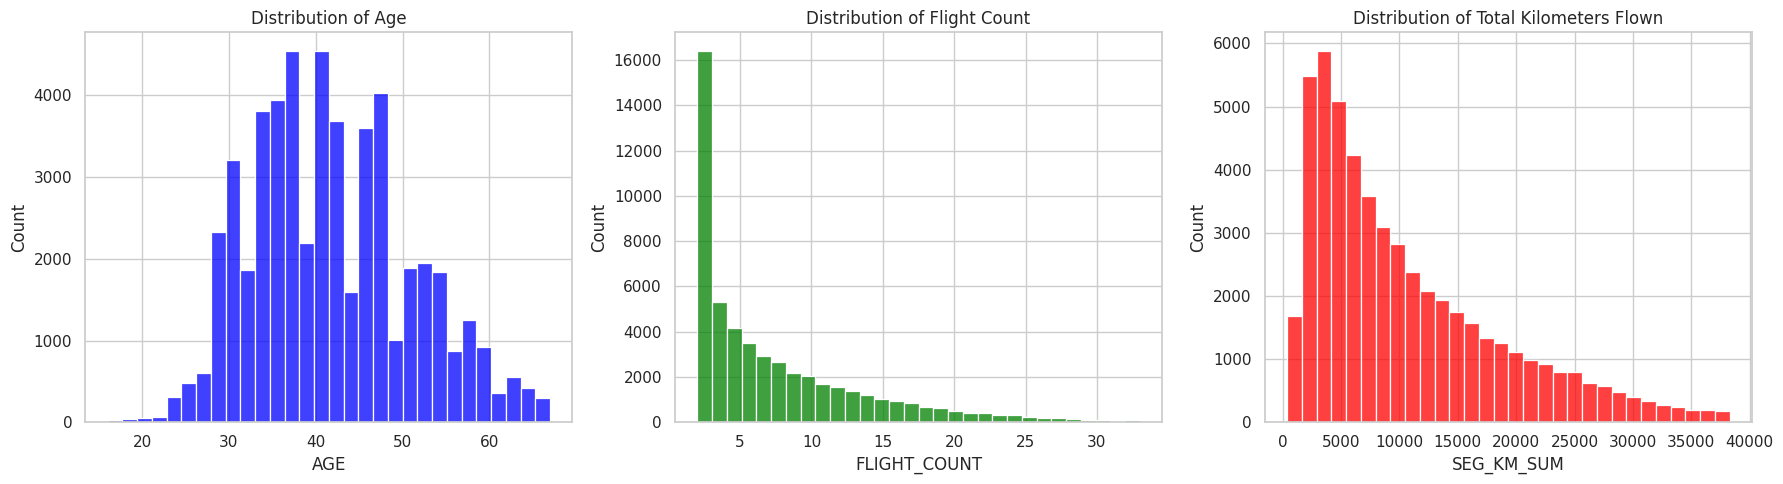

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")

# Create a figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for AGE
sns.histplot(data['AGE'], bins=30, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Age')

# Histogram for FLIGHT_COUNT
sns.histplot(data['FLIGHT_COUNT'], bins=30, ax=axes[1], color='green')
axes[1].set_title('Distribution of Flight Count')

# Histogram for SEG_KM_SUM
sns.histplot(data['SEG_KM_SUM'], bins=30, ax=axes[2], color='red')
axes[2].set_title('Distribution of Total Kilometers Flown')

# Show the plot
plt.tight_layout()
plt.show()

Berikut adalah visualisasi distribusi untuk beberapa variabel dalam dataset:

Distribusi Usia (AGE): Terlihat bahwa sebagian besar anggota berusia antara 30 hingga 50 tahun, dengan puncak sekitar usia 40 tahun. Distribusi ini cukup simetris seputar nilai tengahnya.

Distribusi Jumlah Penerbangan (FLIGHT_COUNT): Mayoritas anggota memiliki jumlah penerbangan yang relatif rendah, dengan sebagian besar di bawah 50 penerbangan. Distribusi ini menunjukkan skewness ke kanan, menunjukkan beberapa anggota yang sangat aktif dengan jumlah penerbangan yang jauh lebih tinggi.

Distribusi Total Kilometer Terbang (SEG_KM_SUM): Mirip dengan jumlah penerbangan, distribusi ini juga memiliki skewness ke kanan. Kebanyakan anggota terbang di bawah 50,000 km, tetapi ada beberapa anggota yang terbang hingga 500,000 km atau lebih.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

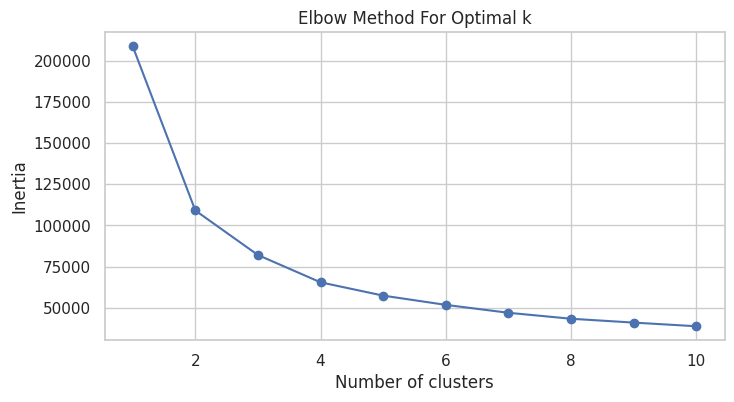

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = data[['AGE', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'Points_Sum']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Using the Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
# K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features_scaled)

# Assigning cluster labels to the data
cluster_labels = kmeans.labels_
data['Cluster'] = cluster_labels

# Re-calculating cluster summaries
cluster_summary = data.groupby('Cluster').agg({
    'AGE': 'mean',
    'FLIGHT_COUNT': 'count',  # Count of members in each cluster
    'SEG_KM_SUM': 'mean',
    'Points_Sum': 'mean',
    'EXCHANGE_COUNT': 'mean',
    'avg_discount': 'mean'
})

cluster_summary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,AGE,FLIGHT_COUNT,SEG_KM_SUM,Points_Sum,EXCHANGE_COUNT,avg_discount
Cluster,,,,,,
0,50.980259,12208,5524.431356,3313.906209,0.043906,0.715025
1,36.179114,9681,13867.522157,9149.660469,0.157422,0.713962
2,34.987009,18166,4950.542772,2940.322140,0.030497,0.679487
3,51.524696,6013,16248.516547,10303.369034,0.169134,0.742483
4,41.985947,6191,26182.329026,16239.828138,0.403650,0.719361


Here's how to interpret the results from each column and cluster:

AGE: Average age of the customers in each cluster.

Cluster 0: Older customers (around 51 years).

Cluster 1 and 2: Younger customers (around 36-35 years).

Cluster 3: Older customers (around 51 years).

Cluster 4: Middle-aged customers (around 42 years).

FLIGHT_COUNT: Average number of flights taken by the customers in each cluster.

Clusters 0 and 2 have much higher average flight counts than the other

clusters, indicating very frequent fliers.

Clusters 1, 3, and 4 have lower flight counts.

SEG_KM_SUM: Total kilometers flown by customers in each cluster.

Cluster 4 customers travel the most distance on average.

Cluster 3 also travels a significant distance.

Cluster 2 travels the least, suggesting shorter but more frequent trips.

Points_Sum: Average number of loyalty points summed over all flights for customers in each cluster.

Cluster 4 has the highest average points, followed by Cluster 3, indicating possibly more long-haul flights or higher ticket purchases.

Clusters 0 and 2 have the least points.

EXCHANGE_COUNT: Average number of times points were exchanged for benefits or rewards.

Cluster 4 shows a higher engagement in loyalty programs, with the most point exchanges.

Clusters 1 and 3 also show some engagement, higher than the least engaged Clusters 0 and 2.

avg_discount: Average discount received on flight bookings.

Discounts are fairly consistent across clusters, with minor variations, indicating that discount levels might not be the primary factor differentiating these clusters.

Each cluster represents a different type of customer segment, which could be targeted differently by marketing strategies or loyalty programs based on their flight behavior, loyalty program engagement, and demographic profiles.

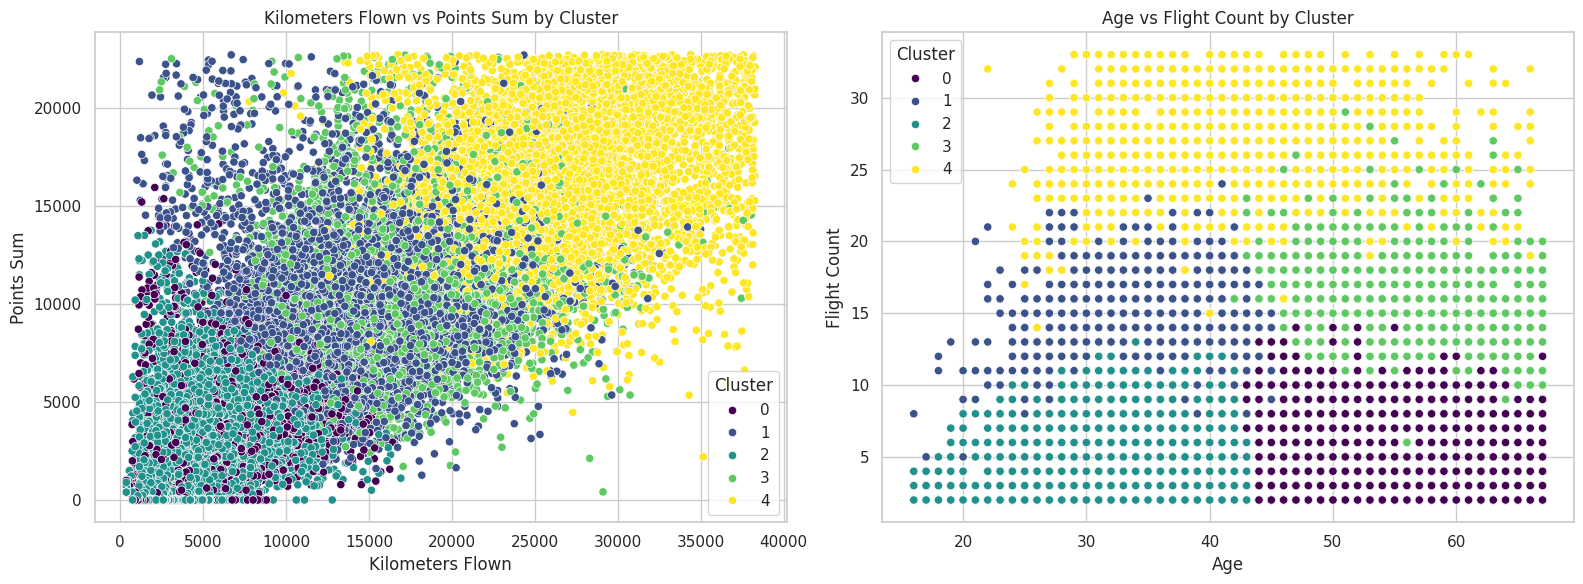

In [39]:
# Visualizing the clusters
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Kilometers Flown vs Points Sum
sns.scatterplot(data=data, x='SEG_KM_SUM', y='Points_Sum', hue='Cluster', palette='viridis', ax=ax[0])
ax[0].set_title('Kilometers Flown vs Points Sum by Cluster')
ax[0].set_xlabel('Kilometers Flown')
ax[0].set_ylabel('Points Sum')

# Scatter plot for Age vs Flight Count
sns.scatterplot(data=data, x='AGE', y='FLIGHT_COUNT', hue='Cluster', palette='viridis', ax=ax[1])
ax[1].set_title('Age vs Flight Count by Cluster')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Flight Count')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
score = silhouette_score(features_scaled, cluster_labels)
print("Silhouette Score: ", score)

Silhouette Score:  0.32280268024069614



Score Interpretation:

The Silhouette Score ranges from -1 to 1.

A score of 1 indicates that clusters are very dense and well-separated, which is the ideal scenario.

A score of 0 suggests that clusters are overlapping.

A score of -1 indicates that data points have been assigned to the wrong clusters.

Score:

A score of approximately 0.40 suggests that the clusters are moderately well-defined and separated.

This indicates that most points in a cluster are closer to their own cluster center than to other cluster centers, but the separation is not very strong.
There is room for improvement, either by tuning the number of clusters, adjusting the features used for clustering, or by preprocessing the data differently.

In summary, my clustering result is reasonably acceptable but not highly distinct. It's effective enough for some practical applications but might not be ideal if very clear separation of groups is critical.

In [41]:
from sklearn.metrics import calinski_harabasz_score
index = calinski_harabasz_score(features_scaled, cluster_labels)
print("Calinski-Harabasz Index: ", index)

Calinski-Harabasz Index:  34564.50723246882


In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data
features = data[['AGE', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'Points_Sum']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)

# Number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print('Number of clusters:', n_clusters)
print('Number of noise points:', n_noise)

Number of clusters: 5
Number of noise points: 314


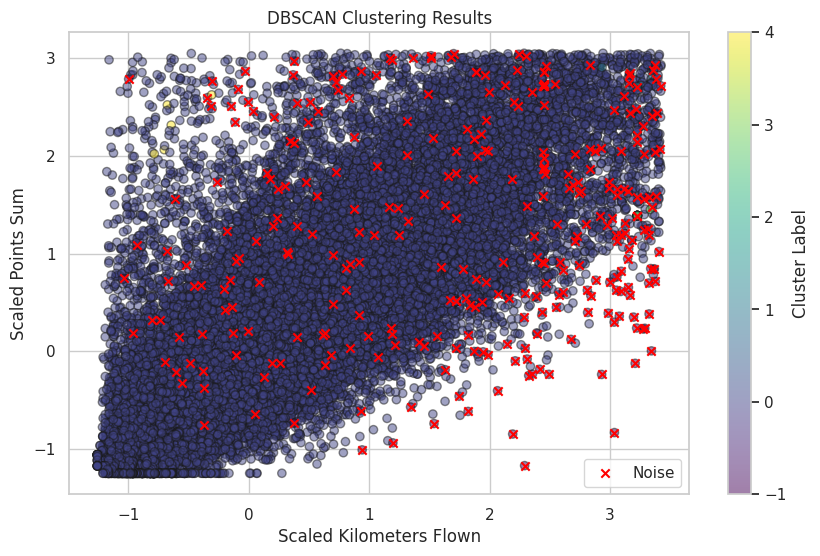

In [36]:
import matplotlib.pyplot as plt

# Assuming 'features_scaled' is your scaled data and 'dbscan_labels' are your DBSCAN labels
x = features_scaled[:,2]  # Example index for SEG_KM_SUM
y = features_scaled[:,3]  # Example index for Points_Sum

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=dbscan_labels, cmap='viridis', alpha=0.5, edgecolor='k')

# Highlighting noise points
noise_mask = dbscan_labels == -1
plt.scatter(x[noise_mask], y[noise_mask], c='red', label='Noise', marker='x')

plt.title('DBSCAN Clustering Results')
plt.xlabel('Scaled Kilometers Flown')
plt.ylabel('Scaled Points Sum')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.show()

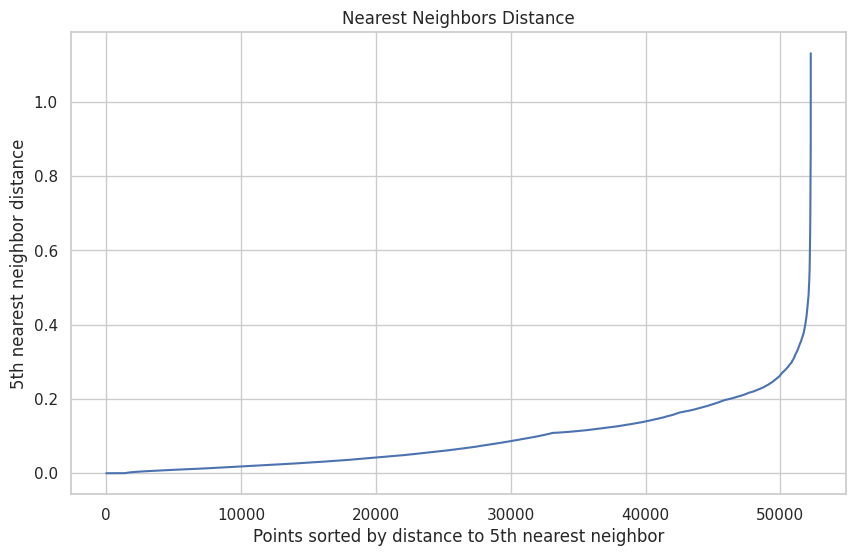

In [37]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features_scaled)
distances, indices = neighbors_fit.kneighbors(features_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Nearest Neighbors Distance')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th nearest neighbor distance')
plt.show()